In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def derivative(x,step):
  return (sigmoid(x+step)-sigmoid(x))/step

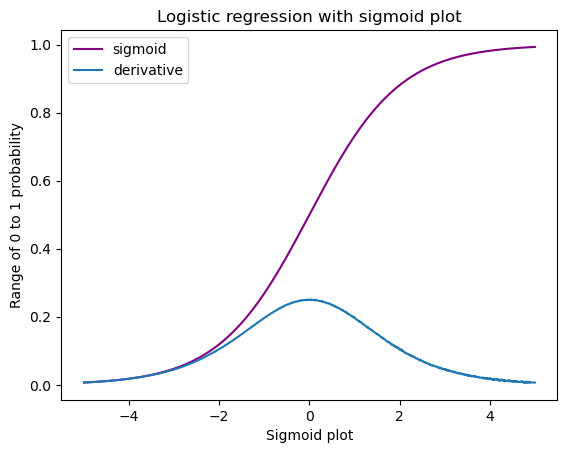

In [3]:
x=np.linspace(-5,5,1000)
y1=sigmoid(x)
y2=derivative(x,0.0000000000001)

plt.plot(x,y1,label='sigmoid',color='purple')
plt.plot(x,y2,label='derivative')
plt.xlabel('Sigmoid plot')
plt.ylabel('Range of 0 to 1 probability')
plt.title('Logistic regression with sigmoid plot')
plt.legend()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#store results from different model
model_result={}  #empty dictionary

In [7]:
td=pd.read_csv('titanic_data.csv')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
td=td[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
td.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
td.shape

(891, 8)

In [13]:
 td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## as per the dataset the survived value in countplot bar plotting is below

<Axes: xlabel='Survived', ylabel='count'>

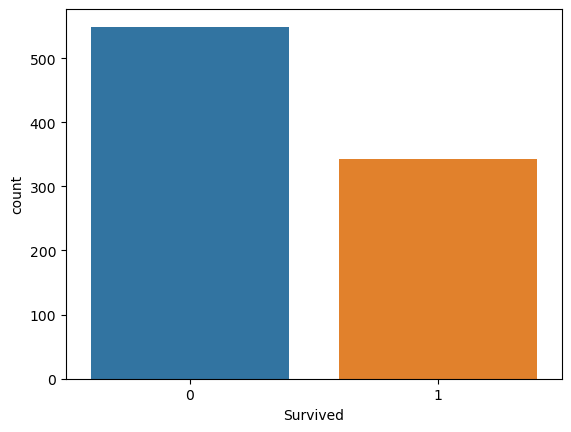

In [14]:
sns.countplot(x='Survived',data=td)

### Before applying classification algorithm model we will perform
### feature engineering task on the data we will cjeck for any missing values in the dataset
## <font color="red"> As per the observation we seen that the features age having total 177 null values. we can replace all null values of age by putting mean value of the age.


In [15]:
td['Age'].mean()

29.69911764705882

In [16]:
td['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
 td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
td['Age'].fillna(td["Age"].mean(),inplace=True)
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### Age is continuous variable it contains 177 null values, we can replace null values by mean and we also dropping two records of whole dataset which contain the null value of the embarked feature

In [20]:
td.dropna(inplace=True)

In [21]:
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [23]:
td.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
#take dependent and independent value separately
td_X=td[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
td_Y=td[['Survived']]

In [25]:
td_Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [26]:
td_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### we have to perform more data cleaning on this dataset. Aim of our classification algorithm to creat:

## <font color='purple'> splitting of our data for 80% and 20% for testing

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(td_X,td_Y,test_size=0.2,random_state=42)

In [28]:
X_train.shape,X_test.shape

((711, 7), (178, 7))

In [29]:
Y_train.shape,Y_test.shape

((711, 1), (178, 1))

### let perform some of the operation on training_data

<Axes: xlabel='Age', ylabel='Density'>

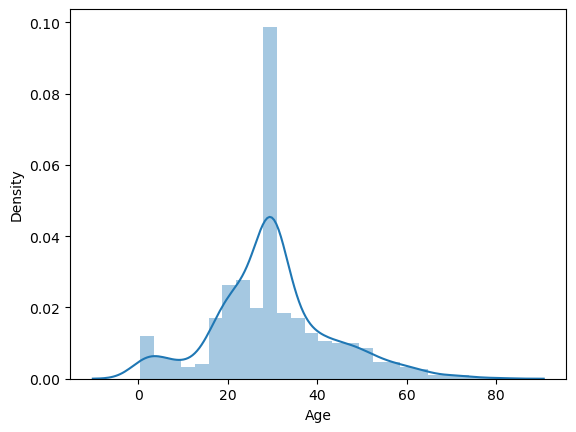

In [30]:
#check the distribution plotting of Age feature
sns.distplot(X_train['Age'])

<Axes: xlabel='Pclass', ylabel='count'>

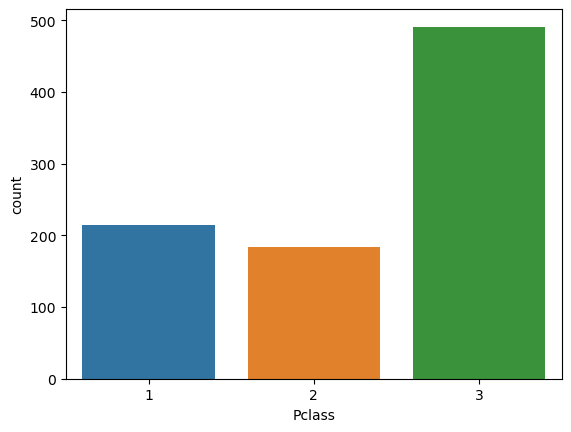

In [31]:
sns.countplot(x='Pclass',data=td)

<Axes: xlabel='Fare', ylabel='Density'>

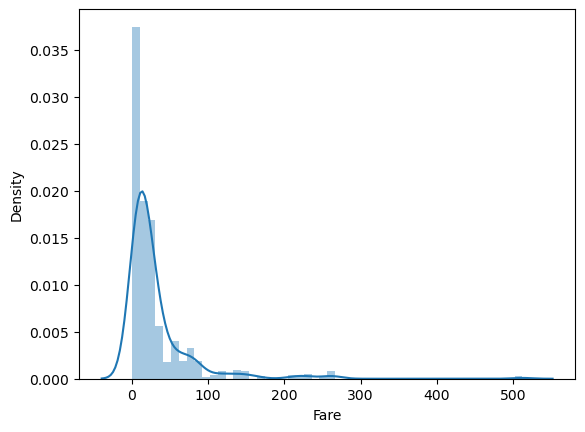

In [32]:
sns.distplot(X_train['Fare'])

In [33]:
#manual form
#we will perform Z-scores normalization on both of these features

from sklearn.preprocessing import StandardScaler
age_scalar=StandardScaler()
age_scalar.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [34]:
fare_scalar=StandardScaler()
fare_scalar.fit(pd.DataFrame(X_train['Fare']))

StandardScaler()

In [35]:
#transform of data
X_train[["Age"]]=age_scalar.transform(X_train[['Age']])
X_train[["Fare"]]=fare_scalar.transform(X_train[['Fare']])

In [36]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,female,-0.599636,0,0,2.430597,S
240,3,female,-0.012500,1,0,-0.358135,C
382,3,male,0.162966,0,0,-0.490949,S
792,3,female,-0.012500,8,2,0.762595,S
683,3,male,-1.209717,5,2,0.301860,S


<Axes: xlabel='Age', ylabel='Density'>

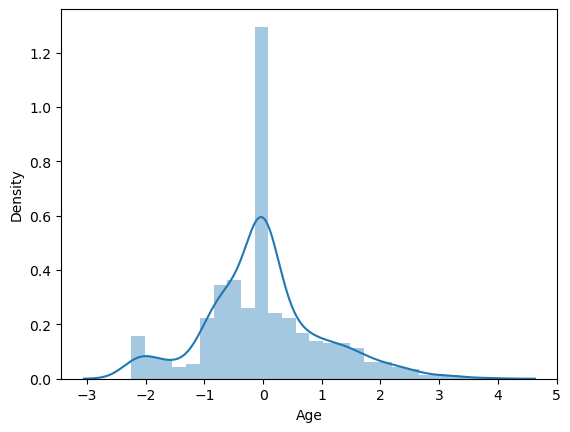

In [37]:
sns.distplot(X_train["Age"])

<Axes: xlabel='Fare', ylabel='Density'>

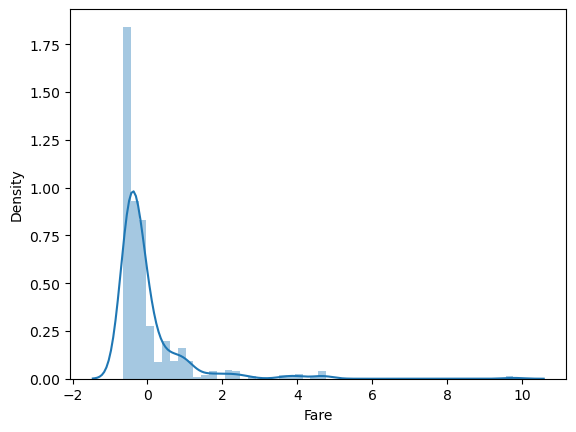

In [38]:
sns.distplot(X_train['Fare'])

#### Day21/  26/06/23

In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,female,-0.599636,0,0,2.430597,S
240,3,female,-0.012500,1,0,-0.358135,C
382,3,male,0.162966,0,0,-0.490949,S
792,3,female,-0.012500,8,2,0.762595,S
683,3,male,-1.209717,5,2,0.301860,S


In [40]:
from sklearn.preprocessing import  LabelEncoder

In [41]:
sex_encoder=LabelEncoder()
sex_encoder.fit(pd.DataFrame(X_train['Sex']))

LabelEncoder()

In [42]:
X_train['Sex']=sex_encoder.transform(X_train['Sex'])

In [43]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,0,-0.599636,0,0,2.430597,S
240,3,0,-0.012500,1,0,-0.358135,C
382,3,1,0.162966,0,0,-0.490949,S
792,3,0,-0.012500,8,2,0.762595,S
683,3,1,-1.209717,5,2,0.301860,S


In [44]:
X_train['Embarked'].value_counts()

S    514
C    132
Q     65
Name: Embarked, dtype: int64

In [45]:
Embarked_encoder=LabelEncoder()
Embarked_encoder.fit(pd.DataFrame(X_train['Embarked']))

LabelEncoder()

In [46]:
X_train['Embarked']=Embarked_encoder.transform(X_train['Embarked'])

In [47]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,0,-0.599636,0,0,2.430597,2
240,3,0,-0.012500,1,0,-0.358135,0
382,3,1,0.162966,0,0,-0.490949,2
792,3,0,-0.012500,8,2,0.762595,2
683,3,1,-1.209717,5,2,0.301860,2


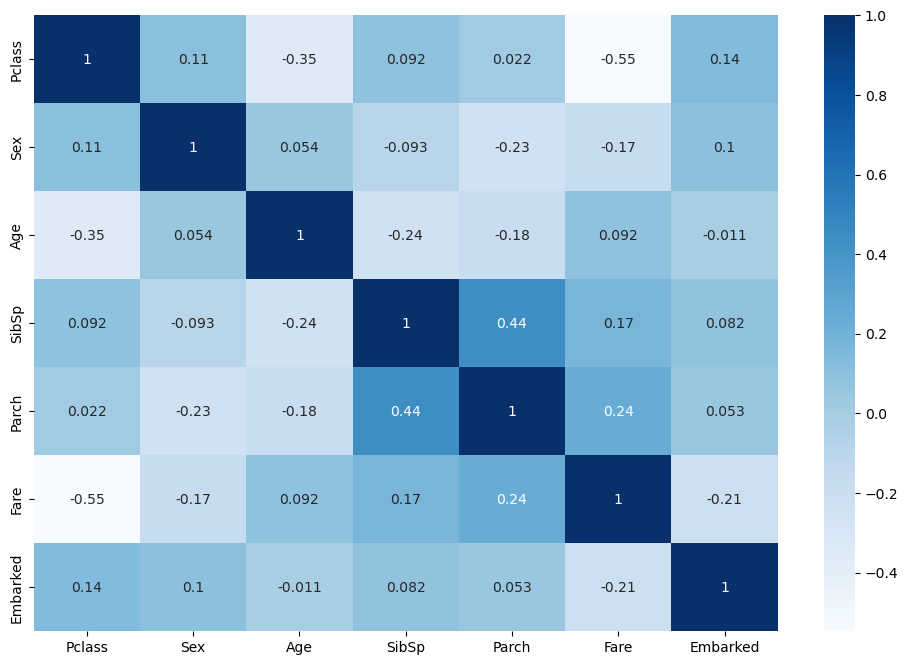

In [48]:
fig=plt.figure(figsize=(12,8))
fig.add_subplot(1,1,1)
sns.heatmap(X_train.corr(),cmap='Blues',annot=True)
plt.show()

### Fare and Pclass has high correlation in logistic regression features to remove the Pclass

In [49]:
del X_train['Pclass']

In [50]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
708,0,-0.599636,0,0,2.430597,2
240,0,-0.012500,1,0,-0.358135,0
382,1,0.162966,0,0,-0.490949,2
792,0,-0.012500,8,2,0.762595,2
683,1,-1.209717,5,2,0.301860,2


In [51]:
X_train_ordinal=X_train.copy()

In [52]:
X_train_orginal=X_train.copy()
X_train=X_train.values
Y_train=Y_train.values

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [55]:
coefficients=pd.concat([pd.DataFrame(X_train_orginal.columns),pd.DataFrame(np.transpose(logistic_model.coef_))],axis=1)

In [56]:
coefficients.columns=['Features','coefficient']

In [57]:
coefficients

,Features,coefficient
0,Sex,-2.503075
1,Age,-0.299958
2,SibSp,-0.426579
3,Parch,-0.193825
4,Fare,0.742928
5,Embarked,-0.258051


In [58]:
coefficients=coefficients.append({'Features':'Intercept','coefficient':logistic_model.intercept_[0]},ignore_index=True)
coefficients

,Features,coefficient
0,Sex,-2.503075
1,Age,-0.299958
2,SibSp,-0.426579
3,Parch,-0.193825
4,Fare,0.742928
5,Embarked,-0.258051
6,Intercept,1.806453


In [59]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
281,3,male,28.0,0,0,7.8542,S
435,1,female,14.0,1,2,120.0000,S
39,3,female,14.0,1,0,11.2417,C
418,2,male,30.0,0,0,13.0000,S
585,1,female,18.0,0,2,79.6500,S


### make a function for the X_test data

In [60]:
def transform_test_data(test_data,sex_encoder,age_scalar,fare_scalar,Embarked_encoder):
    test_data['Sex']=sex_encoder.transform(test_data['Sex'])
    test_data[['Age']]=age_scalar.transform(test_data[['Age']])
    test_data[['Fare']]=fare_scalar.transform(test_data[['Fare']])
    test_data['Embarked']=Embarked_encoder.transform(test_data['Embarked'])
    del test_data['Pclass']
    return test_data
    
    

In [61]:
X_test=transform_test_data(X_test,sex_encoder,age_scalar,fare_scalar,Embarked_encoder)

In [62]:
X_test=X_test.values
Y_test=Y_test.values

In [63]:
Y_pred=logistic_model.predict(X_test)

In [64]:
Y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(Y_test,Y_pred)

array([[90, 19],
       [18, 51]], dtype=int64)

In [67]:
y_perfect_prediction=Y_test

In [68]:
confusion_matrix(Y_test,y_perfect_prediction)

array([[109,   0],
       [  0,  69]], dtype=int64)

In [69]:
from sklearn.metrics import precision_score,recall_score

In [70]:
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))



0.7285714285714285
0.7391304347826086


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(precision_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.7285714285714285
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [73]:
from sklearn.metrics import f1_score

In [74]:
print(f1_score(Y_test,Y_pred))

0.7338129496402879


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
print(accuracy_score(Y_test,Y_pred))

0.7921348314606742


In [77]:
import scikitplot as skplt

### we can plot learning curve of the classifier it contains two separate curves one is training curve another is cross validation score curve .Initially training score is high but it reduces with increasing number of example moving towards generalized solution cv curve as low value.with less data its score increases with higher number of training

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

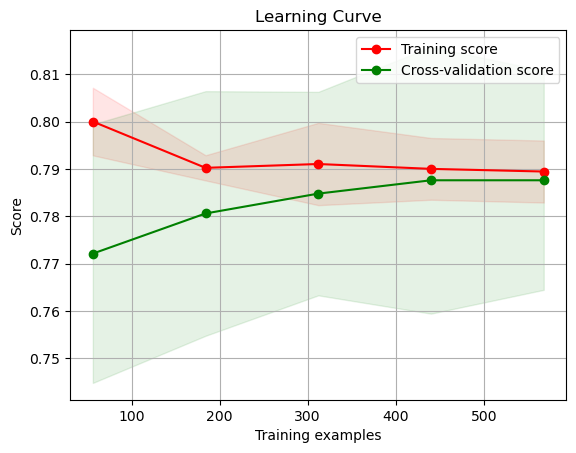

In [78]:
skplt.estimators.plot_learning_curve(logistic_model,X_train,Y_train)


#### We first analyze the learning curve of the logistic regression model. Its shapes can be found in more copmlex datasets very often . The training score is very high when using few few samples , where as the test score is very low at the beginining and then increases when adding the samples . The training and test scores become more realistics when all the samples are used for training


In [79]:
Y_pred_prob=logistic_model.predict_proba(X_test)


In [80]:
#ROC curve
from sklearn.metrics import roc_auc_score
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

0.8296104241457253


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

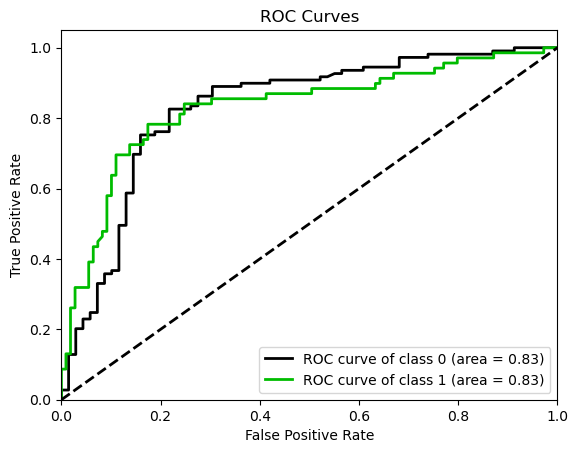

In [81]:
model_result["Logistic_model (L2)"]=roc_auc_score(Y_test,class_1_prob)
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

#### Classification ROC Curve and AUC Curve
An ROC Curve ( Reciever operatting characteristic curve is a graph showing the performance of a classification model at all classification tresholds . This curve plot two parameters):

1) True Positive Rate 2) False Positive Rate
True Positive Rate : is a synonym for recall and is therefore defined as follows.

TPR :- TP (total_positive )/+TN(Total_negative)


### 27/6/23

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

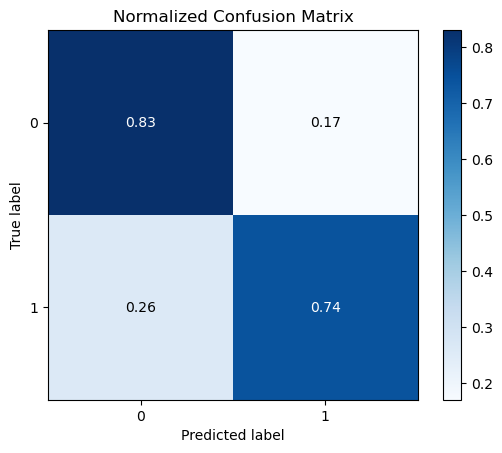

In [82]:
 skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [83]:
#fit the mmodel with L1 norms

In [84]:
logistic_model_l1=LogisticRegression(penalty='l1',class_weight='balanced',solver='saga')
logistic_model_l1.fit(X_train,Y_train)


LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [85]:
LogisticRegression()


LogisticRegression()

In [86]:
Y_pred=logistic_model_l1.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.8033707865168539


In [87]:
Y_pred_prob=logistic_model_l1.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

0.8314718787395292


In [88]:
model_result["Logistic_model(l1)"]=roc_auc_score(Y_test,class_1_prob)

In [89]:
model_result

{'Logistic_model (L2)': 0.8296104241457253,
 'Logistic_model(l1)': 0.8314718787395292}

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

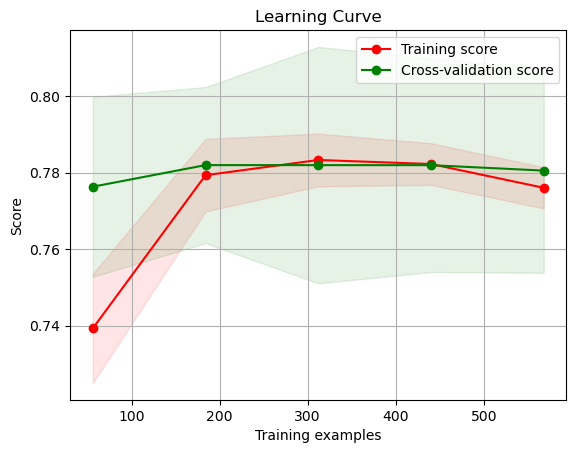

In [90]:
skplt.estimators.plot_learning_curve(logistic_model_l1,X_train,Y_train)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

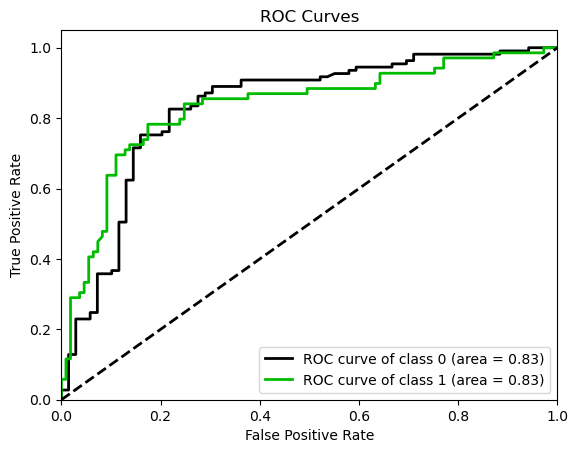

In [91]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

In [92]:
from sklearn import tree

In [93]:
decision_tree=tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [94]:
Y_pred=decision_tree.predict(X_test)
Y_pred_prob=decision_tree.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))

0.7584269662921348


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

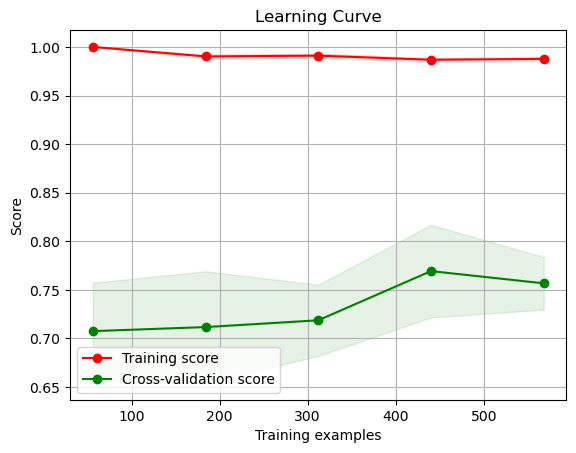

In [95]:
#plotting the learning curve in the case decision tree
skplt.estimators.plot_learning_curve(decision_tree,X_train,Y_train)

In [96]:
Y_pred_prob=decision_tree.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

0.7558170456056376


In [97]:
model_result['Decision_tree']=roc_auc_score(Y_test,class_1_prob)
model_result

{'Logistic_model (L2)': 0.8296104241457253,
 'Logistic_model(l1)': 0.8314718787395292,
 'Decision_tree': 0.7558170456056376}

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

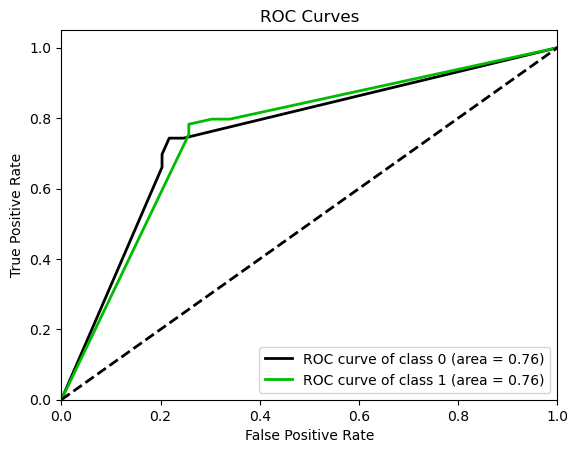

In [98]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

#### Decision Tree:decision trees improve accuracy compare to logistic regression when we analyse the learning curve,we can see that cross validation accuracy is not going up but training error remainshigh.It is because we are dealing with overfitting.one simple method is to restrict the depth of the tree here we choose max depth as 4






In [99]:
decision_tree_4=tree.DecisionTreeClassifier(max_depth=4)
decision_tree_4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [100]:
Y_pred=decision_tree.predict(X_test)
Y_pred_prob=decision_tree_4.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))


0.7584269662921348


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

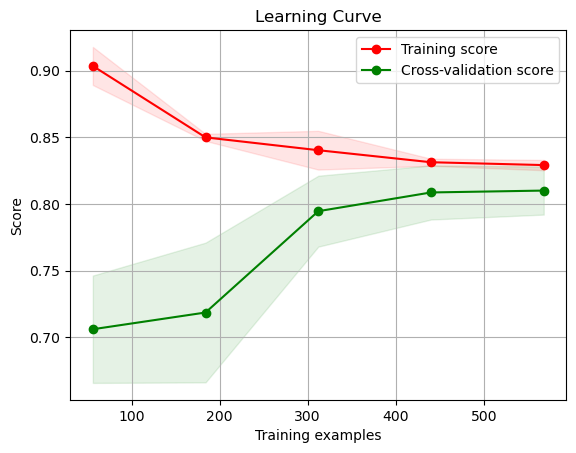

In [101]:
skplt.estimators.plot_learning_curve(decision_tree_4,X_train,Y_train)

#### this is our desirable result,lets check confusion matrix also

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

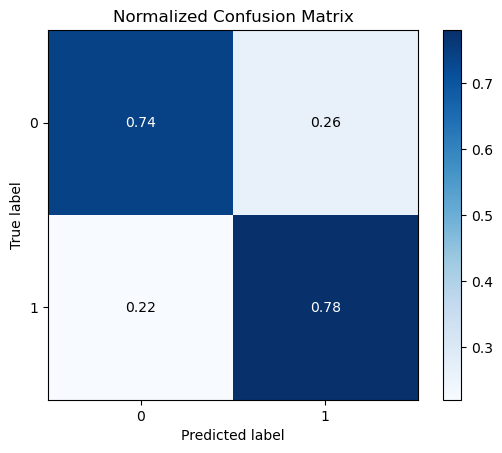

In [102]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [103]:
Y_pred_prob=decision_tree_4.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

0.8612551522403935


In [104]:
model_result["Decision_tree_4"]=roc_auc_score(Y_test,class_1_prob)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

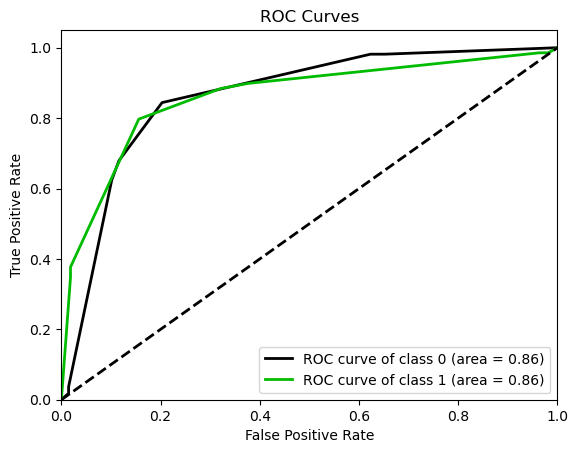

In [105]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
#building of the random forest on the same dataset
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [108]:
Y_pred=random_forest.predict(X_test)
Y_pred_prob=decision_tree.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))


0.7752808988764045


<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

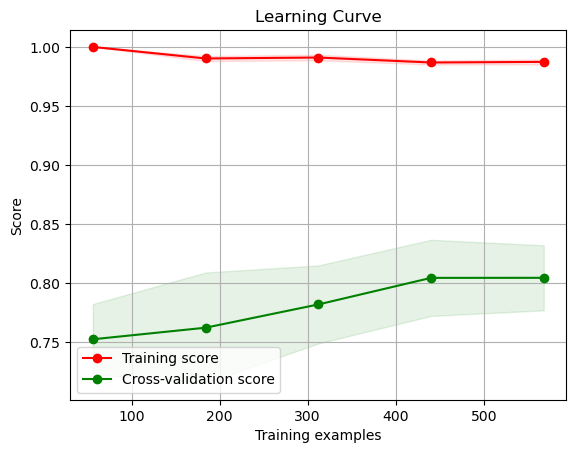

In [116]:
skplt.estimators.plot_learning_curve(random_forest,X_train,Y_train)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

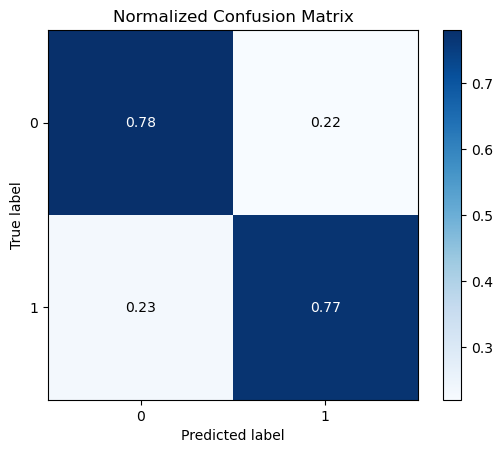

In [110]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

In [111]:
Y_pred_prob=random_forest.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

0.8352612684483447


In [112]:
model_result["Random_forest(Default)"]=roc_auc_score(Y_test,class_1_prob)
model_result

{'Logistic_model (L2)': 0.8296104241457253,
 'Logistic_model(l1)': 0.8314718787395292,
 'Decision_tree': 0.7558170456056376,
 'Decision_tree_4': 0.8612551522403935,
 'Random_forest(Default)': 0.8352612684483447}

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

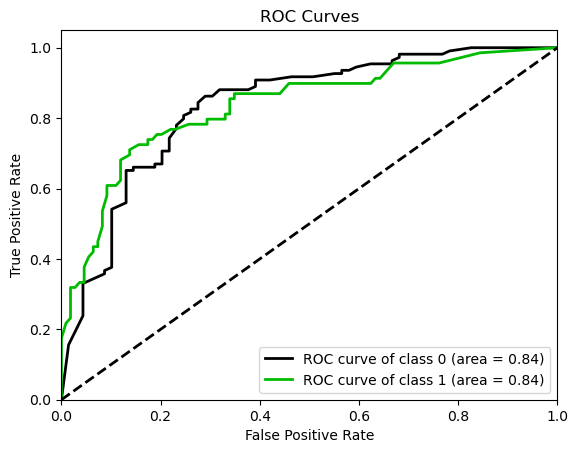

In [113]:
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

## we used default parameter of random forest we can change it and retrain the model.we will do three changes in next model builiding max_depth=5.Each Tree cam go to depth 5n_estimators=100 total 100 trees are build and average prediction taken max_features=3
maximum 3 features can be considered one time

In [114]:
random_forest_5=RandomForestClassifier(max_depth=5,n_estimators=100,max_features=3)
random_forest_5.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_features=3)

In [115]:
Y_pred_prob=random_forest_5.predict_proba(X_test)


NameError: name 'random_fores' is not defined